In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
train_img_path="/content/drive/My Drive/ComputerVision-AmazonGo/Train/"
valid_img_path="/content/drive/My Drive/ComputerVision-AmazonGo/Validation/"

In [ ]:
#  gán nhãn 
label = ['BanhMy', 'BiaNuocNgot', 'HoaQua', 'Rau']


	Tiền xử lý dữ liệu ảnh với ImageDataGenerator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255) # đọc và chuẩn hóa dữ liệu ảnh veef0-1
vaild_data_gen = ImageDataGenerator(rescale=1/255) # đọc và chuẩn hóa dữ liệu ảnh veef0-1



	Đọc dữ liệu train và validation

In [ ]:
train_gener = train_data_gen.flow_from_directory(
    train_img_path, # đường dẫn ts ảnh huấn luyện
    target_size=(50, 50), # biến đổi các ảnh huấn luyện về cùng 1 kích thức[50 x 50]
    class_mode='categorical' # phân loại ảnh đa lớp(4 lớp)
) 
valid_gener = vaild_data_gen.flow_from_directory(
    valid_img_path, # đường dẫn ts ảnh huấn luyện
    target_size=(50, 50), # biến đổi các ảnh huấn luyện về cùng 1 kích thức[50 x 50]
    class_mode='categorical' # phân loại ảnh đa lớp(4 lớp)
) 

Found 651 images belonging to 4 classes.
Found 264 images belonging to 4 classes.


Xây dựng mô hình 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model = tf.keras.models.Sequential()

#  lớp CNN 1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(50,50,3)))
model.add(MaxPooling2D(2, 2))

#  lớp CNN 2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2, 2)) # lớp rút gọn 

#  chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten())

#  lớp ẩn
model.add(Dense(512, activation=tf.nn.relu))

# lớp output
model.add(Dense(4, activation=tf.nn.softmax)) #  4 đầu ra 


In [ ]:
#   thiết lập các tham số để huấn luyện mô hình
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['acc']
              )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Huấn luyện mô hình


In [ ]:
EPOCHS =200
history =model.fit(
    train_gener,
    steps_per_epoch=2,
    epochs = EPOCHS,
    verbose=1,
    validation_data = valid_gener,
    validation_steps = 2
)

Epoch 1/200
2/2 [==============================] - 2s 2s/step - loss: 0.2615 - acc: 0.9375 - val_loss: 0.0725 - val_acc: 1.0000
Epoch 2/200
1/2 [==============>...............] - ETA: 0s - loss: 0.1045 - acc: 0.9688

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


2/2 [==============================] - 3s 2s/step - loss: 0.0730 - acc: 0.9844 - val_loss: 0.0778 - val_acc: 0.9688
Epoch 3/200
2/2 [==============================] - 2s 2s/step - loss: 0.0449 - acc: 1.0000 - val_loss: 0.0224 - val_acc: 1.0000
Epoch 4/200
2/2 [==============================] - 2s 1s/step - loss: 0.0567 - acc: 0.9767 - val_loss: 0.0864 - val_acc: 0.9688
Epoch 5/200
2/2 [==============================] - 2s 2s/step - loss: 0.0455 - acc: 1.0000 - val_loss: 0.0928 - val_acc: 0.9688
Epoch 6/200
2/2 [==============================] - 2s 2s/step - loss: 0.1031 - acc: 0.9688 - val_loss: 0.0434 - val_acc: 1.0000
Epoch 7/200
2/2 [==============================] - 2s 2s/step - loss: 0.0677 - acc: 0.9844 - val_loss: 0.0408 - val_acc: 1.0000
Epoch 8/200
2/2 [==============================] - 2s 2s/step - loss: 0.0133 - acc: 1.0000 - val_loss: 0.0476 - val_acc: 0.9844
Epoch 9/200
2/2 [==============================] - 3s 2s/step - loss: 0.0348 - acc: 0.9844 - val_loss: 0.0204 - val_

sử dụng mô hình

Saving C490E1BAA1i-lC3BD-bia-nC6B0E1BB9Bc-ngE1BB8Dt-585x330.png to C490E1BAA1i-lC3BD-bia-nC6B0E1BB9Bc-ngE1BB8Dt-585x330.png
[[0. 1. 0. 0.]]
gia tri du doan BiaNuocNgot


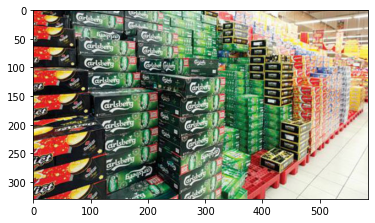

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()
for f in uploaded.keys():
  #  ảnh dự đoán
  path = '/content/' +f 

  #  in ảnh đọc được
  plt.imshow(mpimg.imread(path))

  img = image.load_img(path, target_size=(50, 50))
  x = image.img_to_array(img)
  x =np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  y_pre = model.predict(images, batch_size=10)
  print(y_pre)
  print("gia tri du doan", label[np.argmax(y_pre)])
